12. Дифференциальные уравнения. Робин Гуд
Робин Гуд бросает камень с привязанным к нему письмом через бойницу крепостной стены в открытое окно, стоящего за ней замка:

                    стена                    замок
                    _____ 
                   [     ]                  ______ 
                   [     ]                 [      ]
                   [_____]                 [      ]
                   бойница                 [      ]
                    _____                  [      ]
                   [     ]                 [      ]
                   [     ]                   окно ]
                   [     ]                 [      ]
                   [     ]                 [      ]
.                  [     ]                 [      ]
 \0 _              [     ]                 [      ]
  I                [     ]                 [      ]
 / \               [     ]                 [      ]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Смоделируйте полет камня с помощью функции integrate.ode. Рассмотрите следующие события:

1) камень упал на землю, не долетев до окна (либо до, либо после стены);
2) камень не попал в бойницу (ударился о стену);
3) камень застрял в бойнице (стукнулся о <<пол>> или <<потолок>> бойницы и упал внутри нее);
4) камень стукнулся о стену замка (не попав в окно);
5) камень попал в окно (для простоты считаем, что и крепостная стена, и замок очень высокие и сверху через них камень перебросить нельзя). При наступлении каждого из этих событий вычисления прекращаются.

Написать функцию, на вход которой подаются:

1) параметры: масса камня, расстояние от Робин Гуда до стены, толщину стены (равную длине бойницы), расстояние от земли до бойницы и высоту бойницы, расстояние от стены до замка, расстояние от земли до окна и высоту окна,

2) начальные условия: угол броска и начальную скорость камня.

Программа должна отображать «вид сбоку» (многоугольники можно нарисовать с помощью функций matplotlib.patches.Patch) и траекторию полета.

# Решение

Я ещё в процессе, на днях доделаю

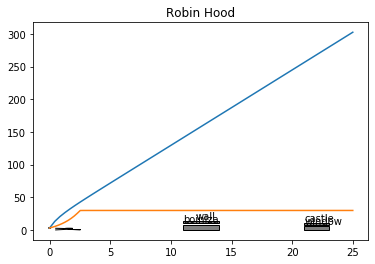

You lose


In [112]:
%matplotlib inline

import os
from matplotlib.path import Path
import math as math
from matplotlib.patches import PathPatch
import matplotlib.lines as lines
from scipy.integrate import odeint
import matplotlib.text as text
import matplotlib.patches as pat
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

#данные для формул
x0 = 0 #начало броска по х
T = 25 #конец броска по х
g = 9.8 #сила тяготения
m = 10 #масса камня
a = 30 #угол броска в градусах
a = (a*math.pi)/180 #переводим его в радианы
x  = np.linspace(x0, T, 60) #длина пути по х
x1  = np.linspace(x0, T, 100) 
y0 = 3 #начало броска по y
v0 = 30 #скорость броска

#данные для рисования графиков
wall_sdvig = 0 #сдвиг стены от Робин Гуда
w_wall = 0 #толщина стены
zemly_boi = 0 #расстояние от земли до бойницы
hei_boi = 0 #высота бойницы
wall_castle = 0 #расстояние от стены до замка
zemly_window = 0 #расстояние от земли до окна замка
hei_window = 0 #высота окна

land = False #попадание

#функция, рисующая стены, человека и траекторию камня
def walldraw(m, wall_sdvig, w_wall, zemly_boi, hei_boi, wall_castle, zemly_window, hei_window):

    vertices = []
    codes = []

    codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY] #wall down
    vertices = [(11+wall_sdvig, 0), (14+wall_sdvig+w_wall, 0), (14+wall_sdvig+w_wall, 8+zemly_boi), (11+wall_sdvig, 8+zemly_boi), (0, 0)]

    codes += [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY] #wall up
    vertices += [(11+wall_sdvig, 10+zemly_boi+hei_boi), (14+wall_sdvig+w_wall, 10+zemly_boi+hei_boi), (14+wall_sdvig+w_wall, 13+zemly_boi+hei_boi), (11+wall_sdvig, 13+zemly_boi+hei_boi), (0, 0)]

    codes += [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY] #castle down
    vertices += [(21+wall_sdvig+wall_castle, 0), (23+wall_sdvig+wall_castle, 0), (23+wall_sdvig+wall_castle, 6+zemly_window), (21+wall_sdvig+wall_castle, 6+zemly_window), (0, 0)]

    codes += [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY] #castle up
    vertices += [(21+wall_sdvig+wall_castle, 7+zemly_window+hei_window), (23+wall_sdvig+wall_castle, 7+zemly_window+hei_window), (23+wall_sdvig+wall_castle, 11+zemly_window+hei_window), (21+wall_sdvig+wall_castle, 11+zemly_window+hei_window), (0, 0)]

    vertices = np.array(vertices, float)
    path = Path(vertices, codes)

    pathpatch = PathPatch(path, facecolor='gray', edgecolor='black')

    line = lines.Line2D([0.5, 1.5], [0, 1], lw=1, color='black') #left leg
    line1 = lines.Line2D([2.5, 1.5], [0, 1], lw=1, color='black') #right leg
    line2 = lines.Line2D([1.5, 1.5], [1, 2], lw=1, color='black') #body
    line3 = lines.Line2D([1.5, 0.5], [2, 2.5], lw=1, color='black') #up left arm
    line4 = lines.Line2D([1.5, 2.5], [2, 2], lw=1, color='black') #right arm
    c = pat.Circle((1.6, 2.3), radius = 0.3, edgecolor='black', facecolor='None') #head
    b = pat.Circle((0, 3), radius = 0.1, edgecolor='black', facecolor='black') #rock

    boi = text.Text(11, 9, 'boiniza', ha='left', va='bottom', color='black') #text boiniza
    w = text.Text(21, 6.15, 'window', ha='left', va='bottom', color='black') #text window
    wall = text.Text(12, 13, 'wall', ha='left', va='bottom', color='black') #text wall
    castle = text.Text(21, 11, 'castle', ha='left', va='bottom', color='black') #text castle
    
    wall_start = 11 + wall_sdvig #начало стены по х
    castle_start = 21 + wall_sdvig + wall_castle #начало замка по х
    boi_start = 8 + zemly_boi #начало бойницы по у
    boi_end = 10 + zemly_boi + hei_boi #конец бойницы
    boi_wid = 14 + wall_sdvig + w_wall - 11 + wall_sdvig #ширина бойницы
    win_start = 6 + zemly_window #начало окна
    win_end = 7 + zemly_window+hei_window #конец окна
    castle_end_y = 11 + zemly_window + hei_window #высота замка
    wall_end_y = 13 + zemly_boi+hei_boi #высота стены
    
    ###вычисление траектории
    #проекция начальной скорости
    vx = v0 * np.cos(a)
    vy = v0 * np.sin(a)

    def dydt(x, y):
     return x * np.tan(a) - (g*m*(x*x) / (2*(v0*v0) * (np.cos(a)*np.cos(a))))

    y1 = odeint(dydt, y0, x1) # решение уравнения
    y1 = np.array(y).flatten()


    def stone(x, y):
        return [y[1], y0 + y[1] * np.tan(a) - (g*m*(y[1]*y[1]) / (2*(v0*v0) * (np.cos(a)*np.cos(a))))]


    sol = integrate.solve_ivp(stone, [t0, T], [h, v0], t_eval=x)

    ###вывод графиков
    fig, ax = plt.subplots()
    ax.add_line(line)
    ax.add_line(line1)
    ax.add_line(line2)
    ax.add_line(line3)
    ax.add_line(line4)
    ax.add_patch(c)
    ax.add_patch(b)
    ax.add_artist(boi)
    ax.add_artist(w)
    ax.add_artist(wall)
    ax.add_artist(castle)
    ax.add_patch(pathpatch)
    ax.set_title('Robin Hood')

    ax.plot(t, sol.y[0,:])
    ax.plot(x1, y1)
    ax.autoscale_view()

    plt.show()
    
    
    return land

wall = walldraw(m, wall_sdvig, w_wall, zemly_boi, hei_boi, wall_castle, zemly_window, hei_window)

if land:
    print("You win")
else:
    print("You lose")

Дополнительные источники информации:

1) https://matplotlib.org/3.2.1/gallery/units/artist_tests.html#sphx-glr-gallery-units-artist-tests-py
2) https://matplotlib.org/3.2.1/gallery/shapes_and_collections/compound_path.html#sphx-glr-gallery-shapes-and-collections-compound-path-py
3) https://www.youtube.com/watch?v=jMBimQnhQNw
4) 09. Дифференциальные уравнения.ipynb
5) https://glebgrenkin.blogspot.com/2014/03/blog-post.html